In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('salary_data_cleaned.csv')

In [5]:
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,r_studio_yn,spark_yn,excel_yn,aws_yn
0,Marketing Data Scientist,$87K-$139K (Glassdoor est.),Who we are:\n\nSoFi is a digital personal fina...,3.2,SoFi\n3.2,"San Francisco, CA","San Francisco, CA",1001 to 5000 employees,2011,Company - Private,...,139,113.0,SoFi\n,CA,9,1,0,0,0,1
1,Data Scientist,$87K-$139K (Glassdoor est.),The opportunity\n\n\nGrammarly empowers people...,5.0,Grammarly\n5.0,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2009,Company - Private,...,139,113.0,Grammarly\n,CA,11,1,0,0,1,0
2,Data Scientist - Machine Learning,$87K-$139K (Glassdoor est.),"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx\n2.5,"Brisbane, CA","South San Francisco, CA",201 to 500 employees,1998,Company - Public,...,139,113.0,CareDx\n,CA,22,1,0,1,1,0
3,Data Scientist,$87K-$139K (Glassdoor est.),Intro\n\nWhy this job?\n\n1. Work on a product...,5.0,Notion Labs\n5.0,"San Francisco, CA","San Francisco, CA",1 to 50 employees,2016,Company - Private,...,139,113.0,Notion Labs\n,CA,4,0,0,0,0,0
4,Risk Data Scientist,$87K-$139K (Glassdoor est.),The Risk Data Scientist will be responsible fo...,3.5,Wish\n3.5,"San Francisco, CA","San Francisco, CA",501 to 1000 employees,2011,Company - Private,...,139,113.0,Wish\n,CA,9,1,0,0,1,0
5,Product Data Scientist - Ads Data Science,$87K-$139K (Glassdoor est.),Who We Are:\n\n\nThe team is responsible for p...,4.0,Twitter\n4.0,"San Francisco, CA","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,139,113.0,Twitter\n,CA,14,1,0,0,0,0
6,Data Scientist,$87K-$139K (Glassdoor est.),"At Wish, our Data Science & Engineering team i...",3.5,Wish\n3.5,"San Francisco, CA","San Francisco, CA",501 to 1000 employees,2011,Company - Private,...,139,113.0,Wish\n,CA,9,1,0,0,0,0
7,Data Scientist,$87K-$139K (Glassdoor est.),Figma is adding to our team of passionate peop...,4.7,Figma\n4.7,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2012,Company - Private,...,139,113.0,Figma\n,CA,8,1,0,0,1,0
8,Data Scientist,$87K-$139K (Glassdoor est.),"About Netskope\n\nToday, there's more data and...",4.1,Netskope\n4.1,"San Francisco, CA","Santa Clara, CA",501 to 1000 employees,2012,Company - Private,...,139,113.0,Netskope\n,CA,8,1,0,1,1,0
9,Sr Data Scientist,$87K-$139K (Glassdoor est.),"About Figure\n\nAt Figure, we're on a mission ...",4.5,Figure\n4.5,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2018,Company - Private,...,139,113.0,Figure\n,CA,2,1,0,1,1,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_studio_yn',
       'spark_yn', 'excel_yn', 'aws_yn'],
      dtype='object')

In [6]:

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

## Job title and seniority 
##  Job description length 
## hourly wage to annual 
#remove new line from job title

In [36]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    500
Name: job_simp, dtype: int64

In [37]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

senior    284
na        216
Name: seniority, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      5482
1      4651
2      3612
3      2098
4      3126
       ... 
495    2099
496    2224
497    3778
498    5168
499    4783
Name: desc_len, Length: 500, dtype: int64

In [13]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [15]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [16]:
df['company_txt']

0                            SoFi
1                       Grammarly
2                          CareDx
3                     Notion Labs
4                            Wish
                  ...            
495       V3 Talent Partners Inc.
496                         HopHR
497            Amarx Search, Inc.
498    Chan Zuckerberg Initiative
499                   Perfect Day
Name: company_txt, Length: 500, dtype: object

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,r_studio_yn,spark_yn,excel_yn,aws_yn,desc_len
count,500.000000,500.00000,500.0,500.0,500.00000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.0000,500.000000,500.000000
mean,2.751200,1387.62400,0.0,0.0,123.23200,194.364000,158.798000,21.732000,0.788000,0.0,0.266000,0.4800,0.300000,3766.166000
std,2.038639,915.04294,0.0,0.0,22.97603,35.495343,28.961902,39.475775,0.409134,0.0,0.442307,0.5001,0.458717,1940.710012
min,-1.000000,-1.00000,0.0,0.0,79.00000,130.000000,105.000000,-1.000000,0.000000,0.0,0.000000,0.0000,0.000000,370.000000
25%,2.700000,-1.00000,0.0,0.0,106.00000,147.000000,120.500000,-1.000000,1.000000,0.0,0.000000,0.0000,0.000000,2499.750000
50%,3.700000,1995.00000,0.0,0.0,141.00000,222.000000,181.500000,8.000000,1.000000,0.0,0.000000,0.0000,0.000000,3469.000000
75%,4.000000,2011.00000,0.0,0.0,141.00000,222.000000,181.500000,21.000000,1.000000,0.0,1.000000,1.0000,1.000000,4979.000000
max,5.000000,2019.00000,0.0,0.0,141.00000,222.000000,181.500000,338.000000,1.000000,0.0,1.000000,1.0000,1.000000,11865.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_studio_yn',
       'spark_yn', 'excel_yn', 'aws_yn', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

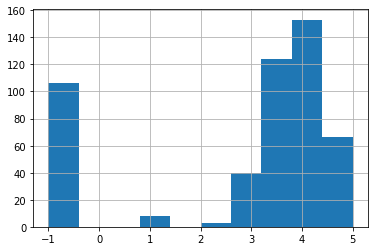

In [19]:
df.Rating.hist()

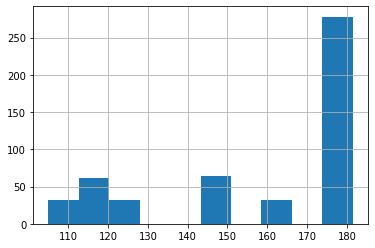

In [20]:
df.avg_salary.hist()

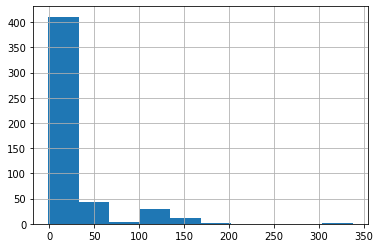

In [21]:
df.age.hist()

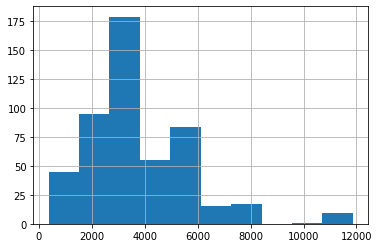

In [22]:
df.desc_len.hist()

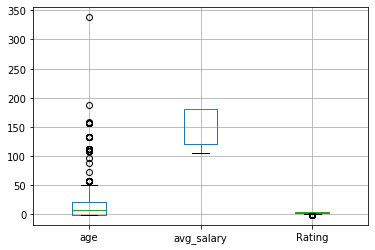

In [23]:
df.boxplot(column = ['age','avg_salary','Rating'])

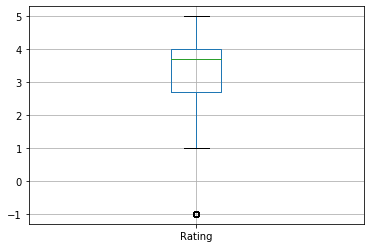

In [24]:
df.boxplot(column = 'Rating')

In [25]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.172416,0.279757,0.398567
avg_salary,0.172416,1.000000,-0.152439,0.177074
Rating,0.279757,-0.152439,1.000000,0.216657
desc_len,0.398567,0.177074,0.216657,1.000000


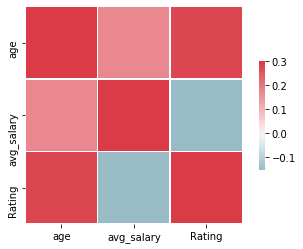

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_studio_yn',
       'spark_yn', 'excel_yn', 'aws_yn'],
      dtype='object')

In [38]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'company_txt', 'job_state', 'python_yn', 'r_studio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 13


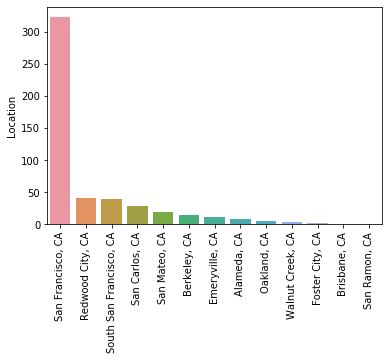

graph for Headquarters: total = 71


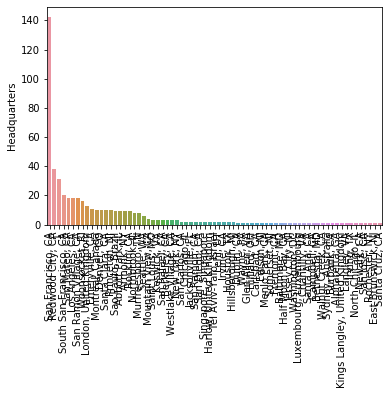

graph for Size: total = 9


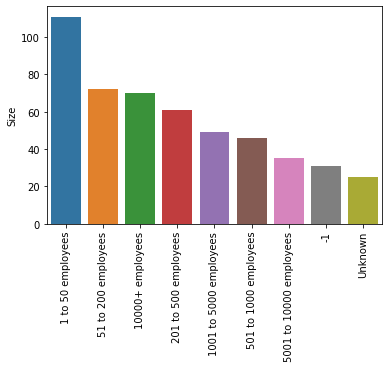

graph for Type of ownership: total = 10


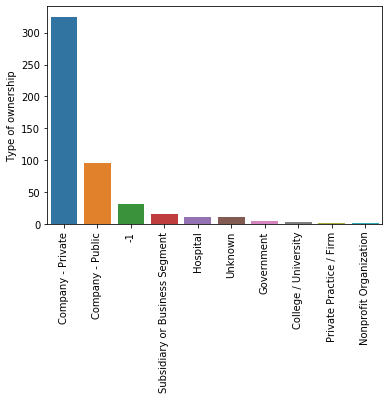

graph for Industry: total = 33


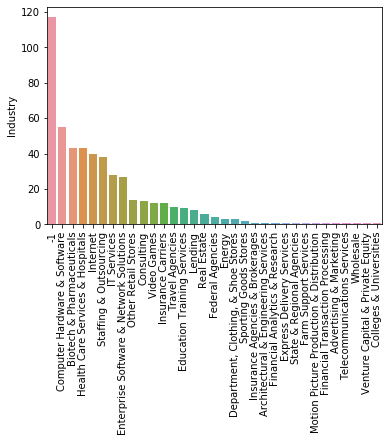

graph for Sector: total = 17


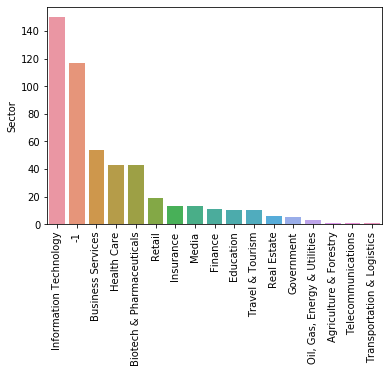

graph for company_txt: total = 168


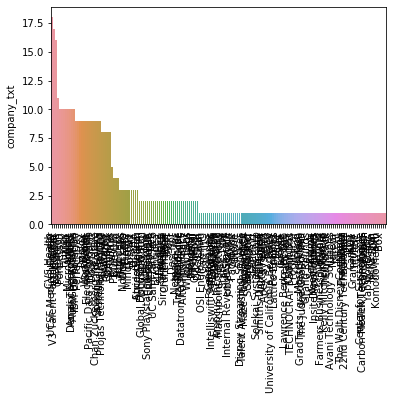

graph for job_state: total = 1


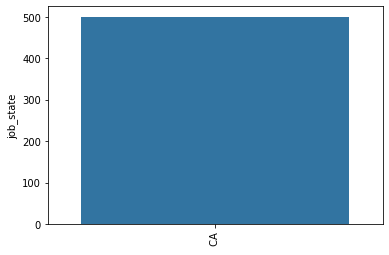

graph for python_yn: total = 2


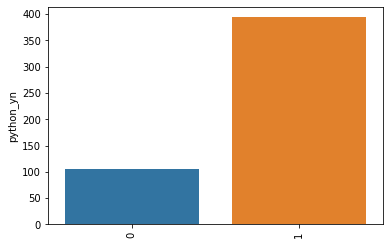

graph for r_studio_yn: total = 1


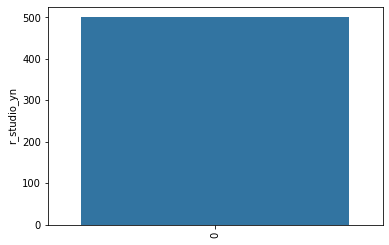

graph for spark_yn: total = 2


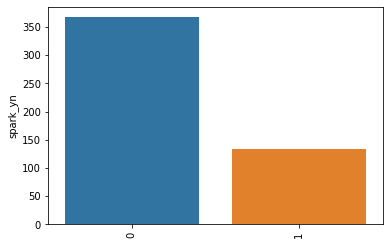

graph for aws_yn: total = 2


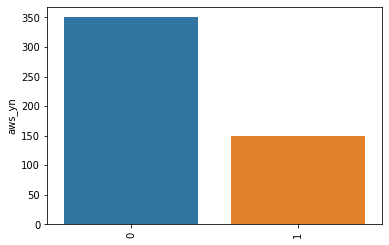

graph for excel_yn: total = 2


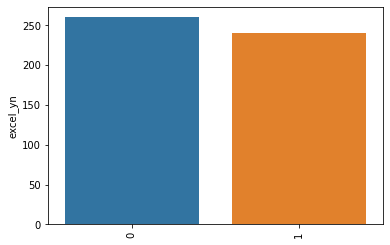

graph for job_simp: total = 1


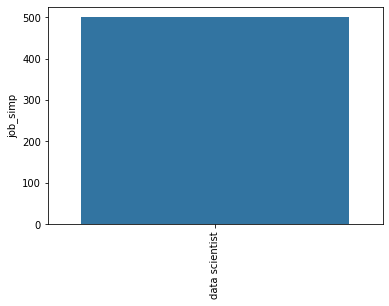

graph for seniority: total = 2


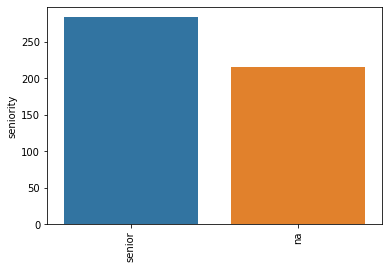

In [39]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [40]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data scientist,158.798


In [41]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
data scientist na         143.787037
               senior     170.214789

In [47]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
Location,job_simp,
"Alameda, CA",data scientist,181.500000
"South San Francisco, CA",data scientist,176.012821
"San Carlos, CA",data scientist,174.964286
"Redwood City, CA",data scientist,172.695122
"Emeryville, CA",data scientist,172.681818
"Berkeley, CA",data scientist,164.300000
"San Mateo, CA",data scientist,154.575000
"San Francisco, CA",data scientist,153.544892
"Walnut Creek, CA",data scientist,145.125000


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_studio_yn',
       'spark_yn', 'excel_yn', 'aws_yn', 'job_simp', 'seniority'],
      dtype='object')

In [48]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [50]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [51]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 1.0    181.500000
 2.7    175.681818
 3.3    173.850000
 4.0    168.488889
 2.9    167.775000
 3.7    167.382353
 4.4    166.695652
 3.6    166.214286
-1.0    164.584906
 4.3    161.593750
 2.3    161.000000
 3.9    160.472973
 3.2    157.600000
 4.2    157.315789
 4.1    156.611111
 3.8    153.527778
 3.4    153.342105
 3.0    143.250000
 4.6    141.250000
 4.8    133.000000
 2.8    133.000000
 5.0    131.416667
 3.1    129.000000
 3.5    127.568182
 4.5    122.031250
 2.0    120.500000
 4.7    118.000000
 2.5    113.000000
Industry
                                          avg_salary
Industry                                            
Education Training Services               181.500000
Travel Agencies                           174.650000
Biotech & Pharmaceuticals                 170.965116
Health Care Services & Hospitals          170.906977
Video Games                               170.458333
Insurance Carriers                        1

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [55]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [57]:
import nltk

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mumes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mumes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

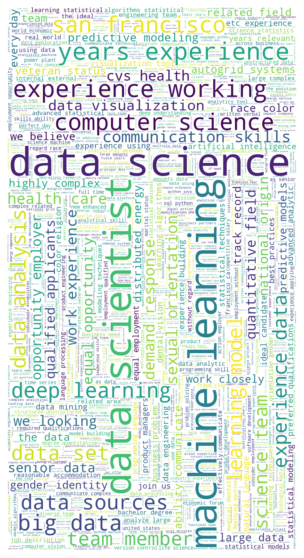

In [62]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()